**Feature Extraction Without data Augmentation**

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 25.4MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.0MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [11]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [12]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [13]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
conv_base.trainable = False

In [16]:
# generators
# when we took data from folder  -- image_dataset_from_directory

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# Normalize 
# image come in array  0-255 range which come under range 0-1

def process(image,label):
  image = tensorflow.cast(image/255, tensorflow.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 84ms/step - loss: 0.2770 - accuracy: 0.8812 - val_loss: 0.2098 - val_accuracy: 0.9102
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1889 - accuracy: 0.9218 - val_loss: 0.2108 - val_accuracy: 0.9126
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1615 - accuracy: 0.9352 - val_loss: 0.2132 - val_accuracy: 0.9106
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1397 - accuracy: 0.9445 - val_loss: 0.3030 - val_accuracy: 0.8834
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1148 - accuracy: 0.9532 - val_loss: 0.2692 - val_accuracy: 0.8936
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0939 - accuracy: 0.9642 - val_loss: 0.2259 - val_accuracy: 0.9142
Epoch 7/10
625/625 [==============================] - 54s 85ms/step - loss: 0.0690 - accuracy: 0.9746 - val_loss: 0.2471 - val_accurac

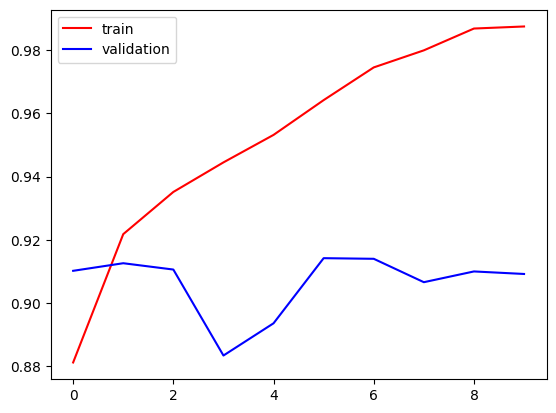

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

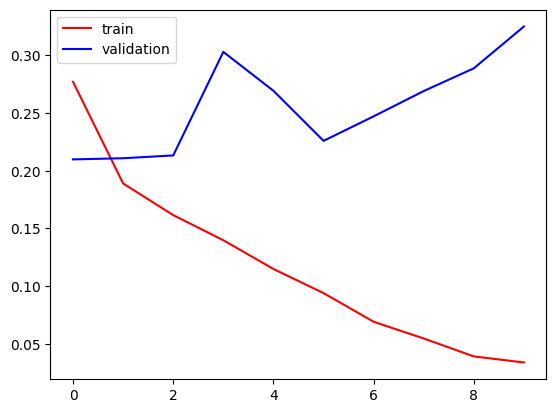

In [21]:
plt.plot(history.history['loss'], color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue', label = 'validation')
plt.legend()
plt.show()